In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data

In [2]:
def getCloseDataPandas(ticker, start, end=None):
    return data.get_data_yahoo(ticker, start, end)["Close"]

def getCloseDataFdr(ticker, start, end=None):
    return fdr.DataReader(ticker, start, end)["Close"]

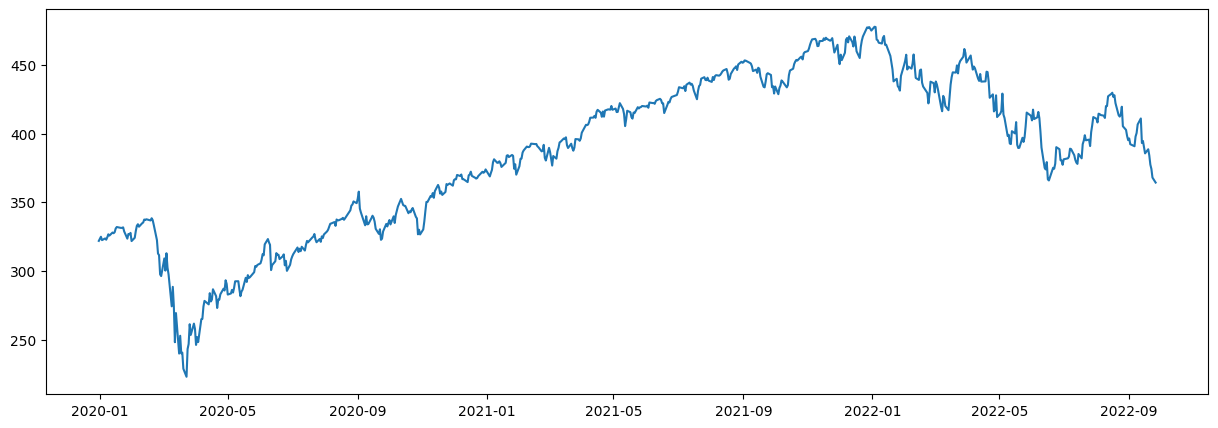

In [3]:
spy = getCloseDataPandas("SPY", "2020")
plt.figure(figsize=(15, 5))
plt.plot(spy, label="spy")


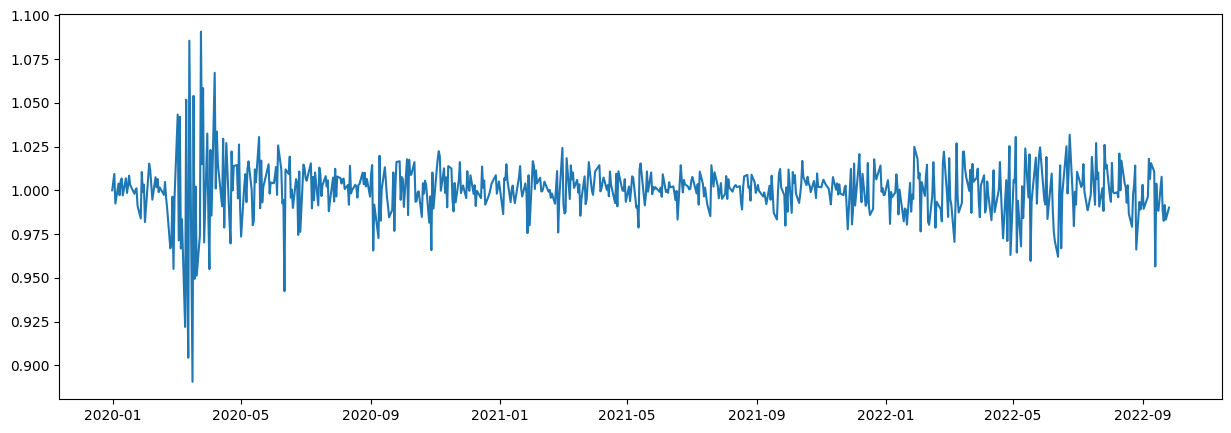

In [4]:
def getDayReturn(closeDataSet):
    return (closeDataSet / closeDataSet.shift(1)).fillna(1)

dayReturn = getDayReturn(spy)
plt.figure(figsize=(15, 5))
plt.plot(dayReturn, label="spy")


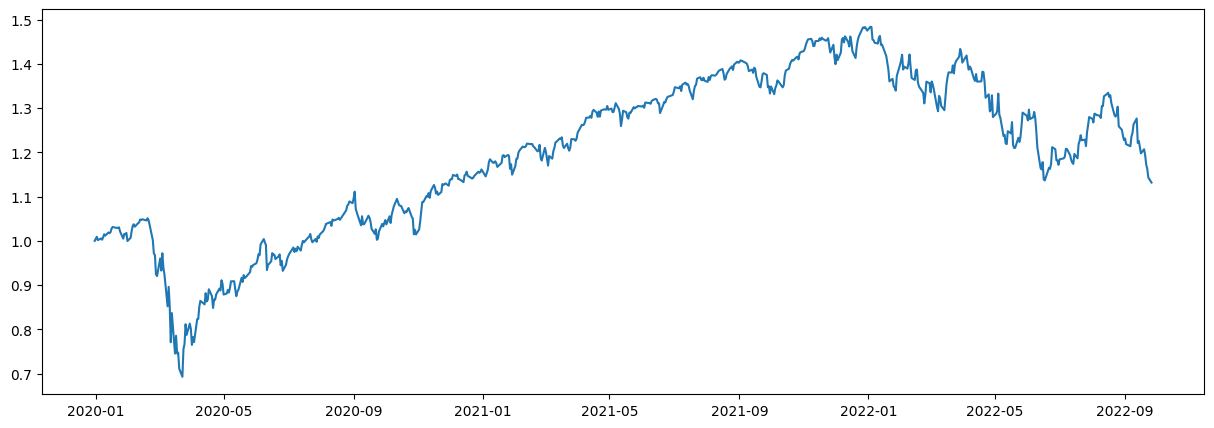

In [5]:
def getCumulativeReturn(closeDataSet):
    return closeDataSet / closeDataSet.iloc[0]

cumulativeReturn = getCumulativeReturn(spy)
plt.figure(figsize=(15, 5))
plt.plot(cumulativeReturn, label="cumulativereturn")


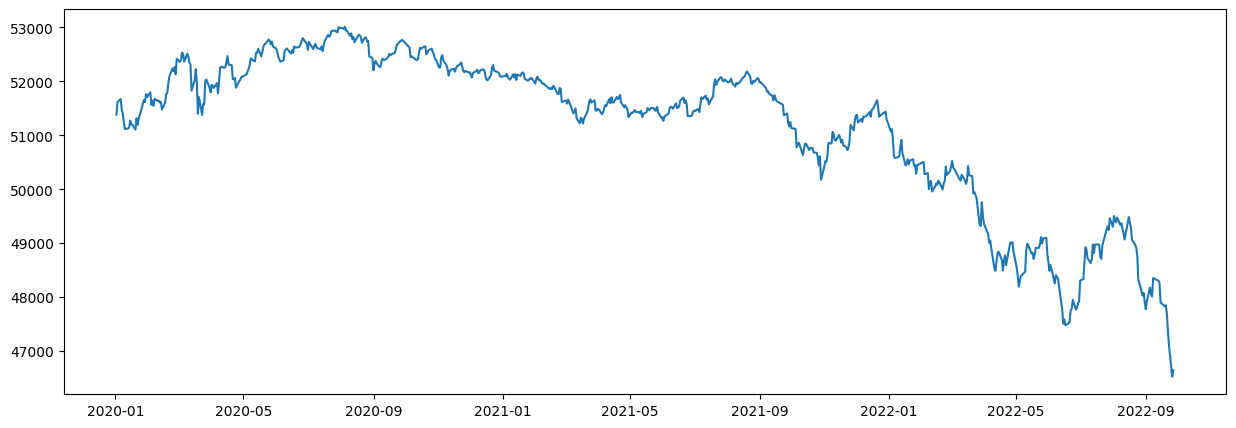

In [6]:
TIGER10Bond = getCloseDataFdr("302190", "2020")
plt.figure(figsize=(15, 5))
plt.plot(TIGER10Bond, label="spy")


In [7]:
dataSet = pd.concat([spy, TIGER10Bond], axis=1)
dataSet.columns = ["SPY", "TIGer10bond"]
dataSet.head(100)

,SPY,TIGer10bond
Date,,
2019-12-31,321.859985,NaN
2020-01-02,324.869995,51385.0
2020-01-03,322.410004,51619.0
2020-01-06,323.640015,51672.0
2020-01-07,322.730011,51478.0
...,...,...
2020-05-13,281.600006,52530.0
2020-05-14,284.970001,52530.0
2020-05-15,286.279999,52604.0


In [11]:
def getPortfolioResult(closeDataSet, weight=None):
    dayReturn = getDayReturn(closeDataSet)
    cumulativeReturn = getCumulativeReturn(closeDataSet)
    if not weight:
        weight = [1/len(closeDataSet.columns)] * len(closeDataSet.columns)

    print(weight)

    portfolioCumulativeReturn = (weight * cumulativeReturn).sum(axis=1)
    portfolioDayReturn = (portfolioCumulativeReturn / portfolioCumulativeReturn.shift(1)).fillna(1)

    return portfolioDayReturn, portfolioCumulativeReturn

_ , portCumRet = getPortfolioResult(dataSet)

[0.5, 0.5]


return: 0.0 
 cagr: 0.0 
 mdd: 100.0


(0.0,
 Date
 2019-12-31      0.000000
 2020-01-02      0.000000
 2020-01-03      0.757223
 2020-01-06      0.378607
 2020-01-07      0.658720
                  ...    
 2022-09-21     21.000184
 2022-09-22     21.663769
 2022-09-23     22.976279
 2022-09-26     23.738250
 2022-09-27    100.000000
 Length: 713, dtype: float64,
 100.0)

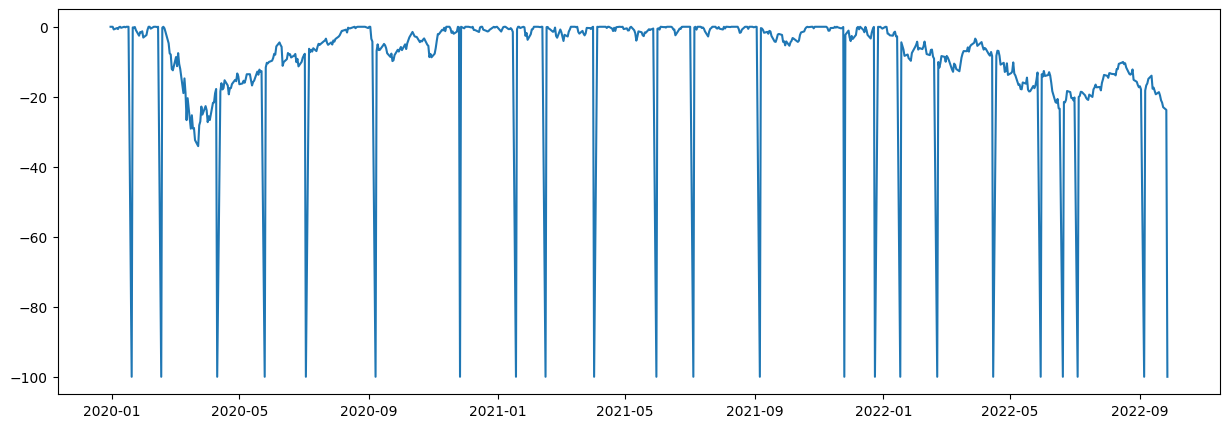

In [9]:
def getEval(cumRet):
    cagr = cumRet.iloc[-1] ** (252/len(cumRet))

    dd = (cumRet.cummax() - cumRet) / cumRet.cummax() * 100
    mdd = dd.max()

    plt.figure(figsize=(15, 5))
    plt.plot(-dd, label="spy")

    print(f"return: {cumRet.iloc[-1]} \n cagr: {cagr} \n mdd: {mdd}")

    return cagr, dd, mdd

getEval(portCumRet)
#중간에 NaN 때문에 밑으로 스파이크 
    


In [10]:
spy = getCloseDataPandas("spy", "2000")
kodex10bond = getCloseDataFdr("152380", "2000")
closeDataSet = pd.concat([spy, kodex10bond], axis=1)
closeDataSet.columns = ["spy", "kodex10"]
closeDataSet.dropna(inplace=True)
closeDataSet

,spy,kodex10
Date,,
2012-01-20,131.949997,49960.0
2012-01-25,132.559998,49960.0
2012-01-26,131.880005,49930.0
2012-01-27,131.820007,50000.0
2012-01-30,131.369995,50130.0
...,...,...
2022-09-20,384.089996,61690.0
2022-09-21,377.390015,61275.0
2022-09-22,374.220001,60875.0


In [12]:
spyDayRet = getDayReturn(closeDataSet["spy"])
spyCumRet = getCumulativeReturn(closeDataSet["spy"])
spyCumRet

Date
2012-01-20    1.000000
2012-01-25    1.004623
2012-01-26    0.999470
2012-01-27    0.999015
2012-01-30    0.995604
                ...   
2022-09-20    2.910875
2022-09-21    2.860099
2022-09-22    2.836074
2022-09-23    2.788556
2022-09-26    2.760970
Name: spy, Length: 2549, dtype: float64

<AxesSubplot:xlabel='Date'>

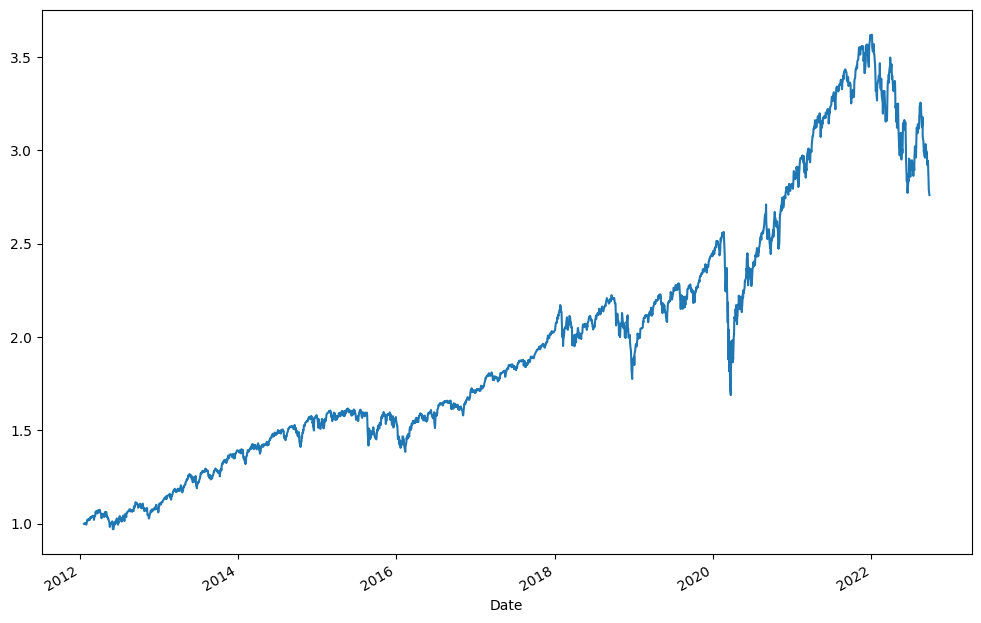

In [15]:
plt.figure(figsize=(12, 8))
spyCumRet.plot(label="stock")


<AxesSubplot:xlabel='Date'>

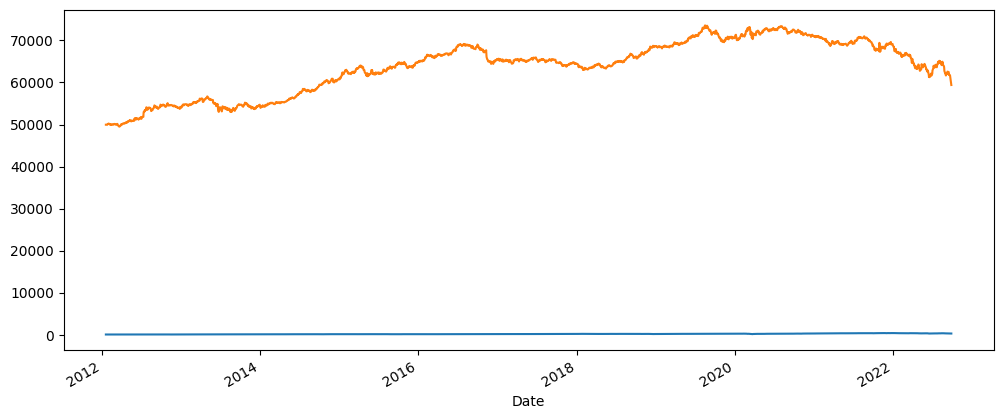

In [17]:
plt.figure(figsize=(12, 5))
closeDataSet["spy"].plot(label="stock")
closeDataSet["kodex10"].plot(label="bond")


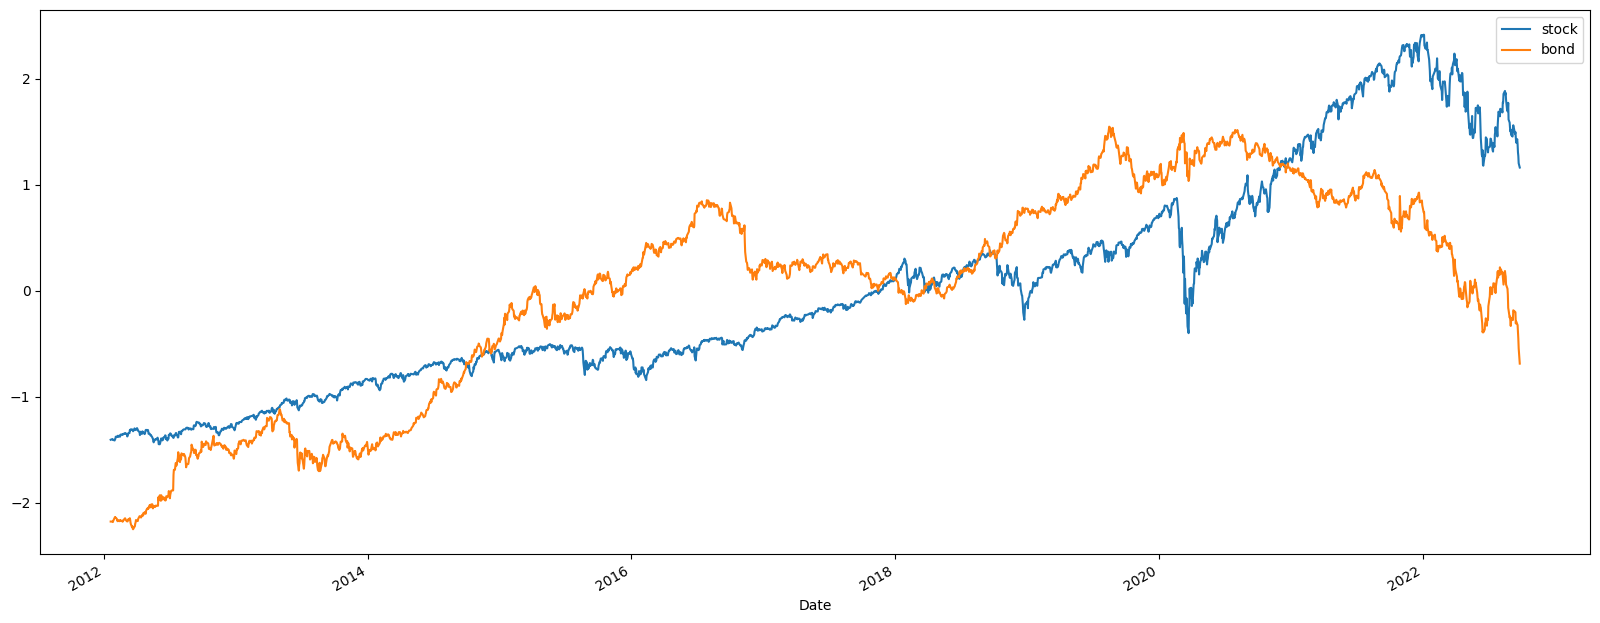

In [18]:
closeDataSet.dropna(inplace=True)
normalizedCloseDataSet = (closeDataSet - closeDataSet.mean()) / closeDataSet.std()
plt.figure(figsize=(20, 8))
normalizedCloseDataSet["spy"].plot(label="stock")
normalizedCloseDataSet["kodex10"].plot(label="bond")
plt.legend()

In [19]:
portDayRet, portCumRet = getPortfolioResult(closeDataSet)
portCumRet

[0.5, 0.5]


Date
2012-01-20    1.000000
2012-01-25    1.002311
2012-01-26    0.999435
2012-01-27    0.999908
2012-01-30    0.999504
                ...   
2022-09-20    2.072832
2022-09-21    2.043290
2022-09-22    2.027275
2022-09-23    1.997861
2022-09-26    1.974861
Length: 2549, dtype: float64

return: 1.9748605552862841 
 cagr: 1.0695901909905086 
 mdd: 22.453019462509666


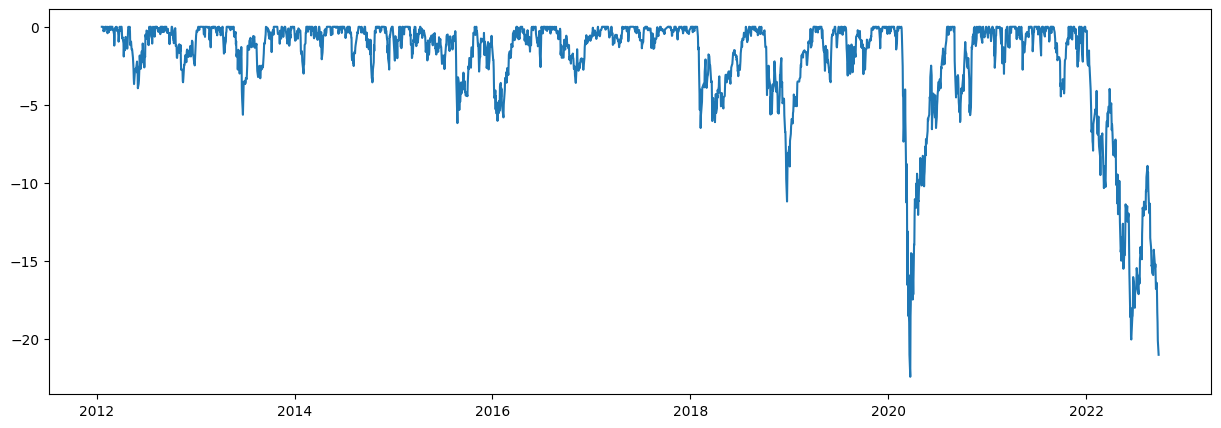

In [21]:
portCagr, portDd, portMdd = getEval(portCumRet)